In [64]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'../../Projects\04-Titanic\assets\train.csv')

In [77]:
for group, frame in df.groupby('Sex'):  # Analisando todas as colunas ao mesmo tempo
    print(frame['Sex'][:3])

1    female
2    female
3    female
Name: Sex, dtype: object
0    male
4    male
5    male
Name: Sex, dtype: object


In [66]:
g = df.groupby(['Sex', 'Pclass'])
g.groups.keys()

dict_keys([('female', 1), ('female', 2), ('female', 3), ('male', 1), ('male', 2), ('male', 3)])

In [67]:
import numpy as np

results = {}
combinations = df.groupby(['Pclass', 'Sex']).groups.keys()

for combo in combinations:
    results[combo] = []

for c in range(1, 50):
    filtered_df = df[df['Age'] > c]

    if not filtered_df.empty:
        grouped = filtered_df.groupby(['Pclass', 'Sex'])['Survived'].mean()
        for combo in combinations:
            results[combo].append(grouped.get(combo, np.nan))
    else:
        for combo in combinations:
            results[combo].append(np.nan)

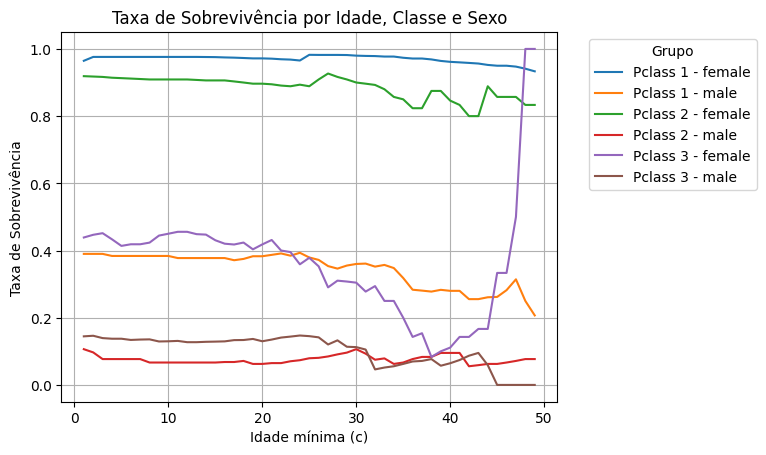

In [68]:
ages = list(range(1, 50))

plt.title('Taxa de Sobrevivência por Idade, Classe e Sexo')
plt.xlabel('Idade mínima (c)')
plt.ylabel('Taxa de Sobrevivência')

for combo, survivals in results.items():
    pclass, sex = combo
    label = f'Pclass {pclass} - {sex}'
    plt.plot(ages, survivals, label=label)

plt.legend(title='Grupo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [69]:
df.groupby(['Sex', 'Pclass'])['Age'].max()

Sex     Pclass
female  1         63.0
        2         57.0
        3         63.0
male    1         80.0
        2         70.0
        3         74.0
Name: Age, dtype: float64

In [70]:
g = df.groupby(['Sex', 'Pclass']).filter(lambda x: x['Survived'].sum() > 50)
g = g.groupby(['Sex', 'Pclass'])['Survived'].agg(['mean', 'sum', 'count'])
g['deaths'] = g['count'] - g['sum']
g

mean  sum  count  deaths
Sex    Pclass                              
female 1       0.968085   91     94       3
       2       0.921053   70     76       6
       3       0.500000   72    144      72

In [71]:
df.groupby(['Pclass', 'Sex'])['Age'].transform('mean')  # Criar novas colunas apartir de agrupamentos

0      26.507589
1      34.611765
2      21.750000
3      34.611765
4      26.507589
         ...    
886    30.740707
887    34.611765
888    21.750000
889    41.281386
890    26.507589
Name: Age, Length: 891, dtype: float64

In [72]:
"""df.reset_index(inplace=True)
df.set_index('Age', inplace=True)

def classe(index):
    if index < 18:
        return 'new'
    elif 18 < index <= 50:
        return 'adult' 
    else:
        return 'older'
    
df.groupby(classe)[['Survived', 'Fare']].agg({'Survived':'count', 'Fare': ('mean', 'median')})"""

"df.reset_index(inplace=True)\ndf.set_index('Age', inplace=True)\n\ndef classe(index):\n    if index < 18:\n        return 'new'\n    elif 18 < index <= 50:\n        return 'adult' \n    else:\n        return 'older'\n\ndf.groupby(classe)[['Survived', 'Fare']].agg({'Survived':'count', 'Fare': ('mean', 'median')})"

In [ ]:
df['age_category'] = pd.cut(df['Age'], bins=[0, 18, 50, 80], labels=['new', 'adult', 'older'])
# labels entram como os intervalos.

C:\Users\RESET Lab\AppData\Local\Temp\ipykernel_4440\1414943736.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['Sex', 'age_category'])['Pclass'].value_counts().unstack().fillna(0)


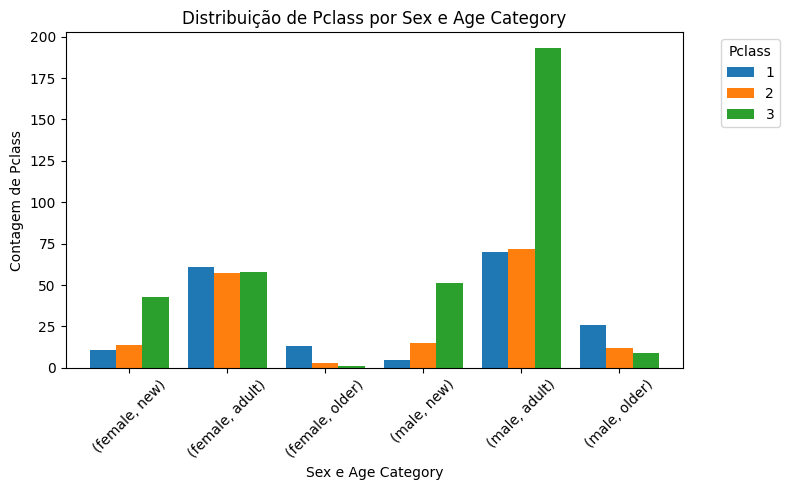

In [101]:
import matplotlib.pyplot as plt

df_grouped = df.groupby(['Sex', 'age_category'])['Pclass'].value_counts().unstack().fillna(0)

df_grouped.plot(kind='bar', width=0.8, figsize=(8,5))

plt.title('Distribuição de Pclass por Sex e Age Category')
plt.xlabel('Sex e Age Category')
plt.ylabel('Contagem de Pclass')
plt.xticks(rotation=45)
plt.legend(title='Pclass', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [102]:
df_grouped

Pclass                1   2    3
Sex    age_category             
female new           11  14   43
       adult         61  57   58
       older         13   3    1
male   new            5  15   51
       adult         70  72  193
       older         26  12    9

In [52]:
df['Name2'] = np.nan

In [53]:
df.filter(like="Name")

,Name,Name2
0,"Braund, Mr. Owen Harris",NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN
2,"Heikkinen, Miss. Laina",NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN
4,"Allen, Mr. William Henry",NaN
...,...,...
886,"Montvila, Rev. Juozas",NaN
887,"Graham, Miss. Margaret Edith",NaN
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",NaN
